In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.special import expit as logistic
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
ff_df = pd.read_csv("fossil-fuel-consumption-by-type.csv ")

us_ff_df = ff_df[ff_df['Entity'] == 'United States']
#us_ff_df = us_ff_df.drop(us_ff_df.columns[[0,1]], axis=1, inplace=True)
                   

In [3]:
us_ff_df.head()

,Entity,Code,Year,Oil Consumption - TWh,Gas Consumption - TWh,Coal Consumption - TWh
5781,United States,USA,1965,6414.477051,4159.206055,3224.244141
5782,United States,USA,1966,6731.245117,4482.756348,3380.846191
5783,United States,USA,1967,6988.793945,4733.188477,3316.996582
5784,United States,USA,1968,7457.960938,5066.814941,3433.076416
5785,United States,USA,1969,7831.837891,5454.106934,3447.237549


In [4]:
total__ffdf =us_ff_df
total__ffdf['Total Fossil fuel Consumption - TWh']  = us_ff_df.iloc[:, [3,4, 5]].sum(axis = 1) 
total__ffdf['Total Fossil fuel Consumption - quads']  = total__ffdf['Total Fossil fuel Consumption - TWh']*0.0034121416331279 
total__ffdf.head()

C:\Users\kitor\AppData\Local\Temp\ipykernel_20316\1772378363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total__ffdf['Total Fossil fuel Consumption - TWh']  = us_ff_df.iloc[:, [3,4, 5]].sum(axis = 1)
C:\Users\kitor\AppData\Local\Temp\ipykernel_20316\1772378363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total__ffdf['Total Fossil fuel Consumption - quads']  = total__ffdf['Total Fossil fuel Consumption - TWh']*0.0034121416331279


,Entity,Code,Year,Oil Consumption - TWh,Gas Consumption - TWh,Coal Consumption - TWh,Total Fossil fuel Consumption - TWh,Total Fossil fuel Consumption - quads
5781,United States,USA,1965,6414.477051,4159.206055,3224.244141,13797.927246,47.080482
5782,United States,USA,1966,6731.245117,4482.756348,3380.846191,14594.847656,49.799687
5783,United States,USA,1967,6988.793945,4733.188477,3316.996582,15038.979004,51.315126
5784,United States,USA,1968,7457.960938,5066.814941,3433.076416,15957.852295,54.450452
5785,United States,USA,1969,7831.837891,5454.106934,3447.237549,16733.182373,57.095988


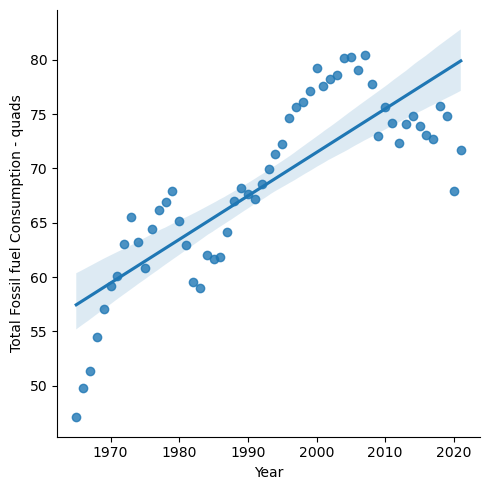

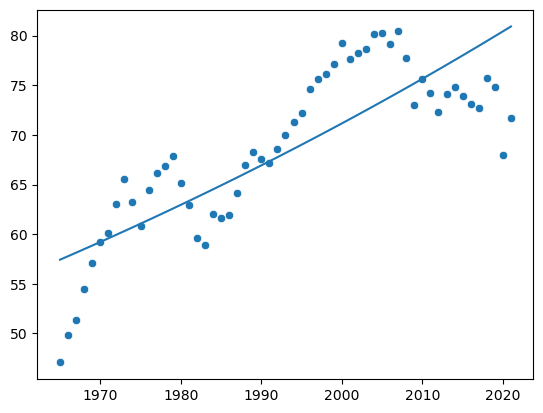

In [5]:
x = pd.array(total__ffdf ['Year'])
y = pd.array(total__ffdf ['Total Fossil fuel Consumption - quads'])

sns.lmplot(data = total__ffdf, x = 'Year', y = 'Total Fossil fuel Consumption - quads')
plt.show()

curve = np.polyfit(x, np.log(y), 1)
x_new = np.linspace(np.min(x), np.max(x))
y_new = np.exp(curve[1]) * np.exp(curve[0] * x_new)

sns.scatterplot(data=total__ffdf, x= x, y= y)
plt.plot(x_new, y_new)
plt.show()

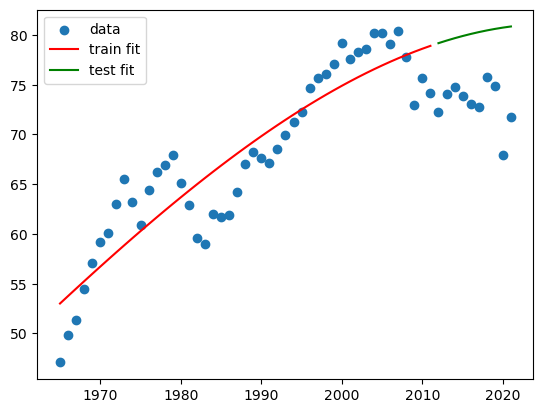


coef =  [-4.94682391e+02  2.54266770e-01 -4.34950614e-05] 
intercept =  320333.08637112624 
train RMSE =  3.516426450292189 
test RMSE =  7.383173433039741 
train MAE =  3.086170363779163 
test MAE =  7.007372680783929


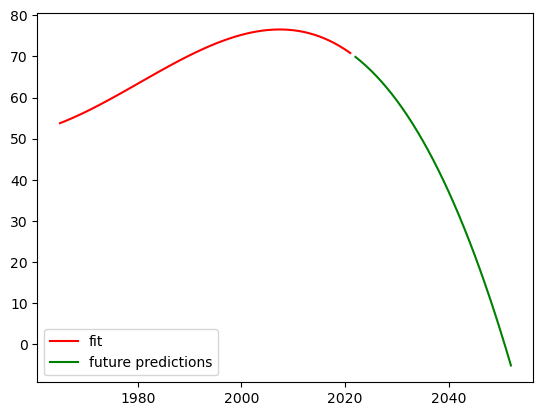

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.57e-20
Time:                        21:23:13   Log-Likelihood:                -153.38
No. Observations:                  57   AIC:                             312.8
Df Residuals:                      54   BIC:                             318.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0384      0.006     -6.379      0.0

In [6]:
x = pd.array(total__ffdf ['Year'])
y = pd.array(total__ffdf ['Total Fossil fuel Consumption - quads'])

polynom = PolynomialFeatures(degree=3, include_bias=False)

xFit = polynom .fit_transform(x.reshape(-1,1)) 
xTrain = xFit [:-10]
yTrain = y[:-10]
xTest = xFit [-10:]
yTest = y[-10:]

model_2 = LinearRegression().fit(xTrain, yTrain)
preditTrain = model_2.predict(xTrain)
predictTest = model_2.predict(xTest)


plt.scatter(x, y, label = "data")
plt.plot(x[:-10], preditTrain, c="red", label = "train fit")
plt.plot(x[-10:], predictTest, c = "green", label = "test fit")
plt.legend(loc='best')
plt.show()

mse_train = mean_squared_error(yTrain, preditTrain)
mse_test = mean_squared_error(yTest, predictTest)
mae_train = mean_absolute_error(yTrain, preditTrain)
mae_test = mean_absolute_error(yTest, predictTest)
    
print('\ncoef = ', model_2.coef_, '\nintercept = ', model_2.intercept_, '\ntrain RMSE = ', np.sqrt(mse_train),\
        '\ntest RMSE = ', np.sqrt(mse_test), '\ntrain MAE = ', mae_train,'\ntest MAE = ', mae_test)

model = LinearRegression().fit(xFit, y)
y_predicted = model.predict(xFit)

years = np.linspace(2022, 2052, 31)
years_res = polynom.fit_transform(years.reshape(-1,1))
new_pred = model.predict(years_res)

plt.plot(x, y_predicted, c="red", label = "fit")
plt.plot(years, new_pred, c = "green", label = "future predictions")
plt.legend(loc='best')
plt.show()

future_df = pd.DataFrame([])
future_df['Year'] = years
future_df['Total Fossil fuel Consumption - quads'] = new_pred
total_df = pd.concat([total__ffdf, future_df])

x_up = xFit.tolist()
y_up = y.tolist()
x_up = sm.add_constant(x_up)
 
result = sm.OLS(y_up, x_up).fit()
print(result.summary())


In [7]:
consumption_df = pd.read_csv("Table_1.3_Primary_Energy_Consumption_by_Source.xlsx - Monthly Data.csv")
consumption_df['Month'] = pd.to_datetime(consumption_df['Month'], format = "%Y %B")
consumption_df = consumption_df.rename(columns={"Month": "Date"})
consumption_df.head()

,Date,Coal Consumption (Quadrillion Btu),Natural Gas Consumption (Excluding Supplemental Gaseous Fuels) (Quadrillion Btu),Petroleum Consumption (Excluding Biofuels) (Quadrillion Btu),Total Fossil Fuels Consumption (Quadrillion Btu),Nuclear Electric Power Consumption (Quadrillion Btu),Hydroelectric Power Consumption (Quadrillion Btu),Geothermal Energy Consumption (Quadrillion Btu),Solar Energy Consumption (Quadrillion Btu),Wind Energy Consumption (Quadrillion Btu),Biomass Energy Consumption (Quadrillion Btu),Total Renewable Energy Consumption (Quadrillion Btu),Total Primary Energy Consumption (Quadrillion Btu)
0,1973-01-01,1.166191,2.397308,3.185268,6.747651,0.068103,0.272703,0.001491,Not Available,Not Available,0.129787,0.403981,7.223873
1,1973-02-01,1.050588,2.170646,2.941986,6.163095,0.064634,0.242199,0.001363,Not Available,Not Available,0.117338,0.360900,6.592366
2,1973-03-01,1.046856,2.057315,2.942485,6.044647,0.072494,0.268810,0.001412,Not Available,Not Available,0.129938,0.400161,6.521439
3,1973-04-01,0.998979,1.873535,2.621315,5.493184,0.064070,0.253185,0.001649,Not Available,Not Available,0.125636,0.380470,5.941729
4,1973-05-01,1.014502,1.765309,2.836567,5.613551,0.062111,0.260770,0.001537,Not Available,Not Available,0.129834,0.392141,6.071940


In [9]:
totFF = consumption_df[['Date','Total Fossil Fuels Consumption (Quadrillion Btu)']]
totFF['Year'] = pd.DatetimeIndex(totFF['Date']).year
totFF=totFF.groupby(['Year']).sum()
totFF['Year'] = totFF.index
totFF.reset_index(inplace = True)
totFF.head()

C:\Users\kitor\AppData\Local\Temp\ipykernel_20316\3052047889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totFF['Year'] = pd.DatetimeIndex(totFF['Date']).year


,Year,Total Fossil Fuels Consumption (Quadrillion Btu)
0,1973,70.282079
1,1974,67.871940
2,1975,65.323405
3,1976,69.070873
4,1977,70.950267
5,1978,71.809332
6,1979,72.844236
7,1980,69.779558
8,1981,67.518799
9,1982,63.835902


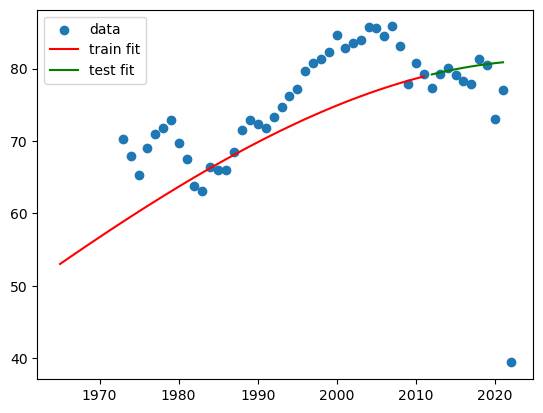


coef =  [-3.08563762e+04  1.54875520e+01 -2.59109663e-03] 
intercept =  20491400.092400927 
train RMSE =  2.235224107369607 
test RMSE =  13.759010831552569 
train MAE =  1.6635612306604384 
test MAE =  11.629482183963201


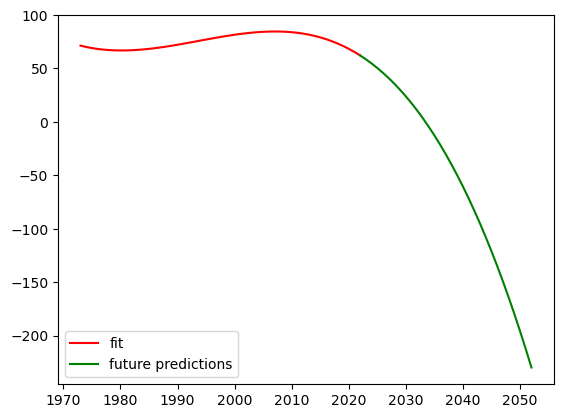

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     15.23
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           7.94e-06
Time:                        21:25:46   Log-Likelihood:                -163.52
No. Observations:                  50   AIC:                             333.0
Df Residuals:                      47   BIC:                             338.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0645      0.015     -4.310      0.0

In [14]:
x2 = pd.array(totFF['Year'])
y2 = pd.array(totFF['Total Fossil Fuels Consumption (Quadrillion Btu)'])

polynomial = PolynomialFeatures(degree=3, include_bias=False)

x2Fit = polynom .fit_transform(x2.reshape(-1,1)) 
xTrain2 = x2Fit [:-10]
yTrain2 = y2[:-10]
xTest2 = x2Fit [-10:]
yTest2 = y2[-10:]

model_3 = LinearRegression().fit(xTrain2, yTrain2)
preditTrain2 = model_3.predict(xTrain2)
predictTest2 = model_3.predict(xTest)


plt.scatter(x2, y2, label = "data")
plt.plot(x[:-10], preditTrain, c="red", label = "train fit")
plt.plot(x[-10:], predictTest, c = "green", label = "test fit")
plt.legend(loc='best')
plt.show()

mse_train = mean_squared_error(yTrain2, preditTrain2)
mse_test = mean_squared_error(yTest2, predictTest2)
mae_train = mean_absolute_error(yTrain2, preditTrain2)
mae_test = mean_absolute_error(yTest2, predictTest2)
    
print('\ncoef = ', model_3.coef_, '\nintercept = ', model_3.intercept_, '\ntrain RMSE = ', np.sqrt(mse_train),\
        '\ntest RMSE = ', np.sqrt(mse_test), '\ntrain MAE = ', mae_train,'\ntest MAE = ', mae_test)

model = LinearRegression().fit(x2Fit, y2)
y_predicted = model.predict(x2Fit)

years = np.linspace(2022, 2052, 31)
years_res = polynom.fit_transform(years.reshape(-1,1))
new_pred = model.predict(years_res)

plt.plot(x2, y_predicted, c="red", label = "fit")
plt.plot(years, new_pred, c = "green", label = "future predictions")
plt.legend(loc='best')
plt.show()

future_df = pd.DataFrame([])
future_df['Year'] = years
future_df['Total Fossil Fuels Consumption (Quadrillion Btu)'] = new_pred
total_df = pd.concat([total__ffdf, future_df])

x_up = x2Fit.tolist()
y_up = y2.tolist()
x_up = sm.add_constant(x_up)
 
result = sm.OLS(y_up, x_up).fit()
print(result.summary())
